Association, linear regression, and model diagnostics

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
temps=pd.read_csv('city_temperature.csv')

In [5]:
temps.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
temps.corr()

,Month,Day,Year,AvgTemperature
Month,1.000000,0.011209,-0.026898,0.075037
Day,0.011209,1.000000,-0.002213,0.000100
Year,-0.026898,-0.002213,1.000000,0.087245
AvgTemperature,0.075037,0.000100,0.087245,1.000000


In [7]:
temps.cov()

,Month,Day,Year,AvgTemperature
Month,11.947317,0.340965,-2.173883,8.331767
Day,0.340965,77.449392,-0.455346,0.028310
Year,-2.173883,-0.455346,546.730058,65.531577
AvgTemperature,8.331767,0.028310,65.531577,1031.925288


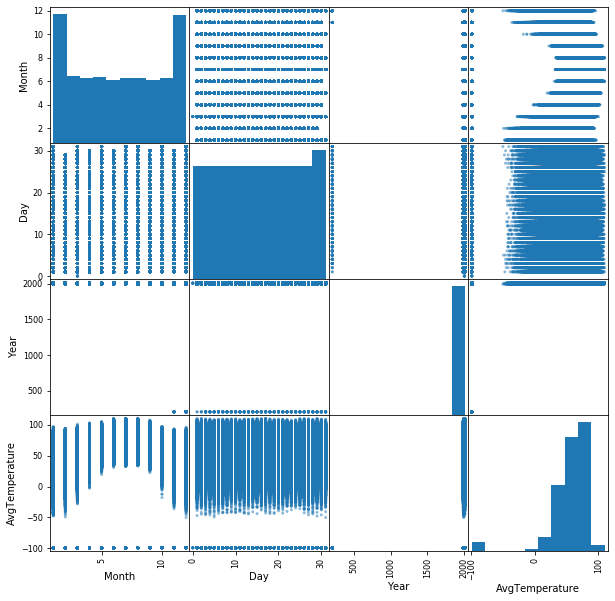

In [18]:
sm = scatter_matrix(temps, figsize=(10, 10))

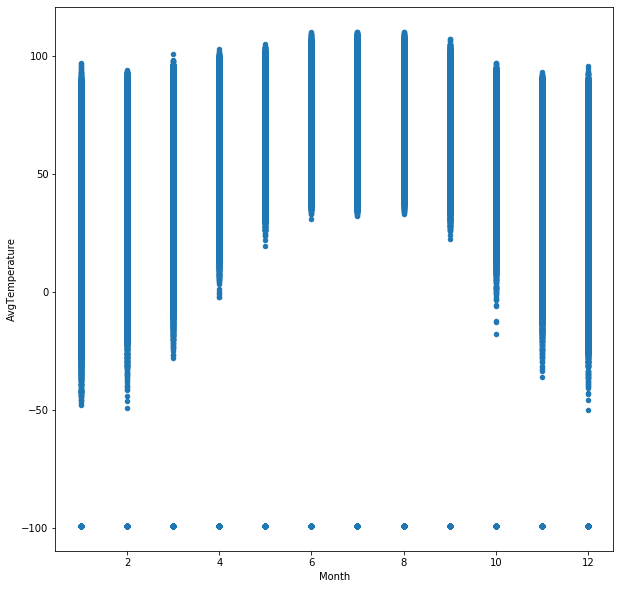

In [19]:
temps.plot(kind='scatter', x='Month', y='AvgTemperature', figsize=(10, 10))

In [20]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [24]:
formula = None
model = smf.ols(formula='AvgTemperature~Month', data=temps).fit()

C:\Users\btipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


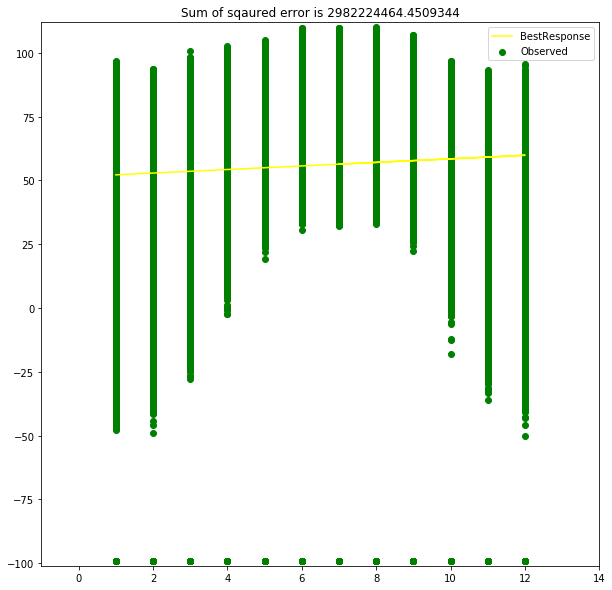

In [26]:

plt.figure(figsize=(10, 10))
# slope and intercept from least square method
b0_ols = model.params[0]
b1_ols = model.params[1]

#create a column for least squares approx
temps['BestResponse'] = b0_ols + b1_ols*temps['Month']

# Also want to know the error of of guess...
temps['error'] = temps['AvgTemperature'] - temps['BestResponse']
plt.title('Sum of sqaured error is {}'.format((((temps['error'])**2)).sum()))
plt.scatter(temps['Month'], temps['AvgTemperature'], color='g', label='Observed')
plt.plot(temps['Month'], temps['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(temps['Month'].min()-2, temps['Month'].max()+2)
plt.ylim(temps['AvgTemperature'].min()-2, temps['AvgTemperature'].max()+2)
plt.show()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AvgTemperature   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:51:07   Log-Likelihood:            -1.4199e+07
No. Observations:             2906327   AIC:                         2.840e+07
Df Residuals:                 2906325   BIC:                         2.840e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4935      0.040   1291.460      0.000      51.415      51.572
Month          0.6974      0.005    128.285      0.000       0.687       0.708
==============================================================================
Omnibus:                  1915744.271   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23358801.220
Skew:                          -3.100   Prob(JB):                         0.00
Kurtosis:                      15.428   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared is very low, likely we are missing other factors determining the AvgTemp


# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

we do not have linearity, as plot of AvgTemp against month is not roughly linear

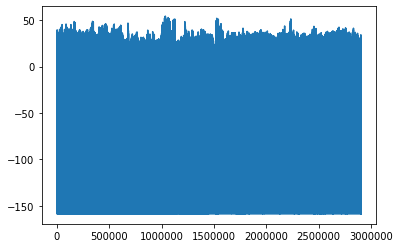

In [30]:
plt.plot(temps['error'])

no obvious pattern in error, this is also measured by Durbin-Watson

we standardize error to see if it is roughly normal:

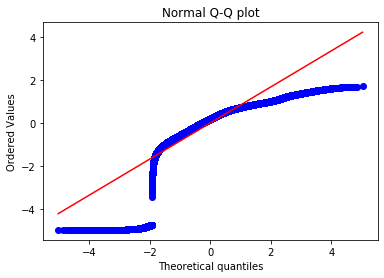

In [31]:
import scipy.stats as stats
z = (temps['error'] - temps['error'].mean())/temps['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

We want the above to fall on red, line. This fails normality test

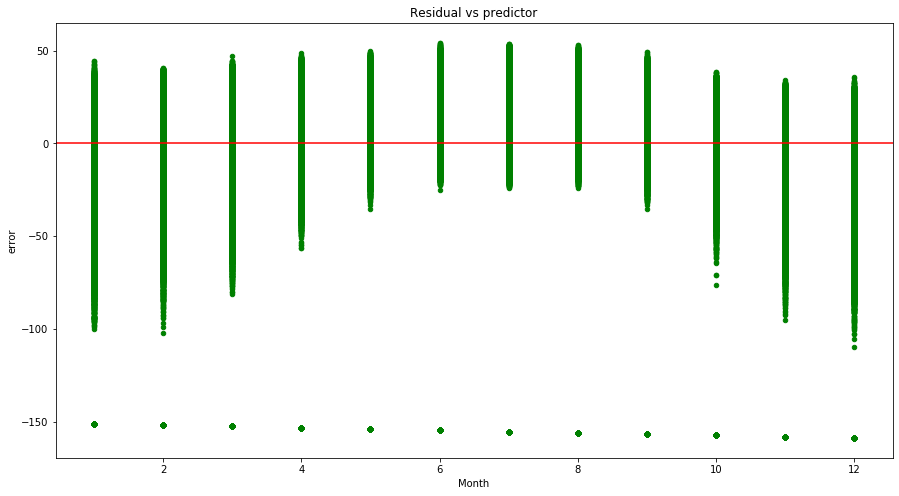

In [32]:
# Residual vs predictor plot
temps.plot(kind='scatter', x='Month', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

Equal variance is violated as well, as variance is larger towards months 0 and 12

Conclusion: this linear regression should not be used to make statistical inferences

In [ ]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()